# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "../TooBigForGit/traffic-signs-data/train.p"
validation_file= "../TooBigForGit/traffic-signs-data/valid.p"
testing_file = "../TooBigForGit/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Training Set: {}".format(len(training_file)))
print("Validation Set: {}".format(len(validation_file)))
print("Testing Set: {}".format(len(testing_file)))

Training Set: 42
Validation Set: 42
Testing Set: 41


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
# Assume that the images are all the same shape, so use shape of first image
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

1


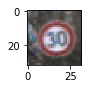

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import math

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data.
### Other preprocessing steps could include converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import cv2

# Shuffle the training set so that we never train in the same order
# This is important because we don't want to have to rely on the ordering of data
X_train, y_train = shuffle(X_train, y_train)


# Min-Max scaling for grayscale image data
def normalize_scale(X):
    a = 0
    b = 1.0
    return a + X * (b-a) / 255

def standardize(X):
    X -= np.mean(X) # zero-center
    X /= np.std(X) # normalize
    return (X)

n_channels = 3 # assume default network input is RGB 

def rgb2gray(X):
    gray = np.dot(X, [0.299, 0.587, 0.114])
    gray = gray.reshape(len(X),32,32,1)
    global n_channels
    n_channels = 1
    return gray
    
# preprocessing pipeline
def preprocess_dataset(X):
    X = rgb2gray(X)
    X = normalize_scale(X)
    X = standardize(X)
    return X

X_train = preprocess_dataset(X_train.astype(np.float32))
X_valid = preprocess_dataset(X_valid.astype(np.float32))
X_test = preprocess_dataset(X_test.astype(np.float32))

# EPOCHS tells TF how many times to run our training data through the network
# The more EPOCHS, the better our model will train but also the longer it will take
EPOCHS = 100

# Tells TF how many taining images to run through the network at a time
# The larger the batch_size, the faster the model will train,
# but our processer may have a limit on how large of a batch it can run
BATCH_SIZE = 128

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def ClassifyTrafficSign(x):    
    # Arguments used for tf.truncated_normal,
    # randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.001
    dropout = 1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # This layer has a 5x5 filter with an input depth of 1 and an output depth of 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)) #Weights
    conv1_b = tf.Variable(tf.zeros(6)) #Biases
    # Now we use the conv2d function to convolve the filter over the images, and we add the baises at the end
    # The formula for convolutions tells us that the output height = the input height minus the filter height + 1
    # all divided by the vertical stride. In this case: (32 - 5 + 1)/1 = 28 (This also works for output width)
    # Convolutional layer output = 28x28x6
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    # Activate the output of the convollutional layer (28x28x6) with a ReLU activation function
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    # Pool the output using a 2x2 kernel with a 2x2 stride which gives us a pooling output of 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # The network then runs through another set of convolutional activation and pooling layers giving and output of 5x5x16
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    # We then flatten this output (5x5x16) into a vector of length 5x5x16 which equals 400
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    # We pass our last output into this fully connected layer with a width of 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    # We apply a ReLU activation to the ouput of the fully connected layer
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    # We repeat this pattern, but this time for a layer with width 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # Finally, we attach a fully connected output layer with a width equal to
    # the number of classes in our label set, in this case: 10, one for each digit
    # The width of the output layer is 10. This output is also known as our logits that we return
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    
    # dropout
    fc2 = tf.nn.dropout(fc2, dropout)
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
# Here we set up our tensorFlow variables

import tensorflow as tf

# x is a placeholder that will store our input batches
# We initialize the batch size to non which allows the placeholder to
# later accept a batch of any size, and we set the image dimensions to 32x32x1
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# y stores our labels in this case our labels come through with sparse variables
# which just means that they are integers, they aren't one-hot encoded yet
y = tf.placeholder(tf.int32, (None))

keep_prob = tf.placeholder(tf.float32)

# We use the tf.ont_hot() function to one-hot encode the labels
one_hot_y = tf.one_hot(y, n_classes)

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# Now we can set up our training pipeline

# The learning rate tells tf how quickly to update the networks weights
rate = 0.001

# We pass the input data to the LeNet function to calculate our logits
logits = ClassifyTrafficSign(x)

# We use the below function to compare our logits to the ground truth labels
# and calculate the cross entropy (a measure of how different the different
# the logits are from the ground truth training labels)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# The tf reduced mean function averages the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

# Adam optimizer uses an algorithm to minimize the loss function
# Similar to stochastic gradient descent, but a little more complex
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# We run the minimize function on the optimizer which uses back propagation
# to update the network and minimize our training loss
training_operation = optimizer.minimize(loss_operation)

In [9]:
# In this code cell we set up another pipeline, this time for evaluating the model
# The training pipeline above trains the model, but the evaluation pipeline
# we create here will evaluate how good the model is

# The first step is to measure whether a given prediction is correct by
# comparing the logit prediction to the one-hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# The second step in the pipeline is to compute the models overall accuracy
# by averaging the individual prediction accuracies 
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# We use the evaluate function to run evaluation pipeline
# The function takes a dataset as input. It averages the accuracy of each
# batch to calculate the total accuracy of the model
def evaluate(X_data, y_data):
    # It sets some initial variables
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    # Batches the data set and runs it through the evaluation pipeline
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
# Now that everything else is set up we can build a function to train and
# validate our model

# First we create the TF session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    # We train over whatever number of EPOCHs has been set
    for i in range(EPOCHS):
        # At the beginning of each EPOCH we shuffle our training data to
        # ensure that our training isn't bias by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Then we break our training data into batches and train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        # At the end of each EPOCH we evaluate the model on our validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    # Once we have completely trained the model we save it so that
    # we can load it up later and modify it, or evaluate it on our test dataset
    save_file = './lenet'
    #save_file = './lenetmodel\model.ckpt'
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.054

EPOCH 2 ...
Validation Accuracy = 0.180

EPOCH 3 ...
Validation Accuracy = 0.343

EPOCH 4 ...
Validation Accuracy = 0.518

EPOCH 5 ...
Validation Accuracy = 0.629

EPOCH 6 ...
Validation Accuracy = 0.675

EPOCH 7 ...
Validation Accuracy = 0.749

EPOCH 8 ...
Validation Accuracy = 0.813

EPOCH 9 ...
Validation Accuracy = 0.838

EPOCH 10 ...
Validation Accuracy = 0.836

EPOCH 11 ...
Validation Accuracy = 0.857

EPOCH 12 ...
Validation Accuracy = 0.874

EPOCH 13 ...
Validation Accuracy = 0.875

EPOCH 14 ...
Validation Accuracy = 0.884

EPOCH 15 ...
Validation Accuracy = 0.890

EPOCH 16 ...
Validation Accuracy = 0.889

EPOCH 17 ...
Validation Accuracy = 0.883

EPOCH 18 ...
Validation Accuracy = 0.887

EPOCH 19 ...
Validation Accuracy = 0.896

EPOCH 20 ...
Validation Accuracy = 0.900

EPOCH 21 ...
Validation Accuracy = 0.902

EPOCH 22 ...
Validation Accuracy = 0.896

EPOCH 23 ...
Validation Accuracy = 0.906

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read signnames.csv file
import pandas as pd
sign_names = pd.read_csv('signnames.csv')
sign_names.head(43)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


roadWorkAhead.jpg
priorityRoad.jpg
rightOfWay.jpg
animalCrossing.png


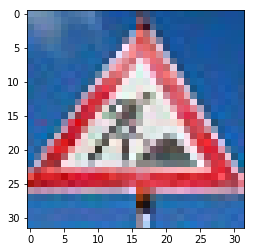

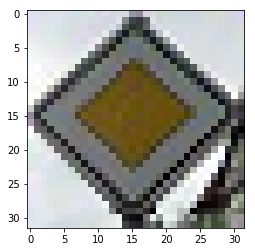

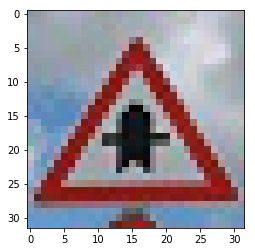

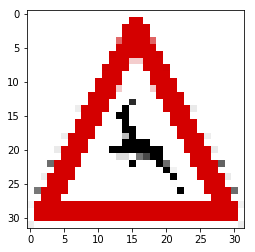

In [14]:
from PIL import Image
import os


im_new_list = []


for filename in os.listdir('extra_imgs'):
    print(filename)
    im = Image.open('extra_imgs/' + filename)
    im_new = im.resize((32, 32), 3)
    plt.figure(figsize=(4,4))
    plt.imshow(im_new)
    #print(im_new.shape)
    im_new_list.append(im_new)
    
truth_values = [25, 12, 11, 31]

### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import csv

def normalize_scale(X):
    a = 0
    b = 1.0
    return a + X * (b-a) / 255

def standardize(X):
    X -= np.mean(X) # zero-center
    X /= np.std(X) # normalize
    return (X)

n_channels = 3 # assume default network input is RGB 

def rgb2gray(X):
    gray = np.dot(X, [0.299, 0.587, 0.114])
    gray = gray.reshape(len(X),32,32,1)
    global n_channels
    n_channels = 1
    return gray
    
# preprocessing pipeline
def preprocess_dataset(X):
    X = rgb2gray(X)
    X = normalize_scale(X)
    X = standardize(X)
    return X

images = preprocess_dataset(im_new_list) #.astype(np.float32) doesn't work: "'list' object has no attribute 'astype'"

dict_signs = {}
with open('signnames.csv', 'r') as csvfile:
    lines = csvfile.readlines()
    n_classes = len(lines) - 1
    count = 0 
    for row in lines:
        if count > 0: 
            dict_signs[count - 1] = row.split(',')[1]
        count += 1

logits_list = []

for img in im_new_list:
    im_new = np.asarray(img)
    im_new = im_new[np.newaxis, ...]
    im_new = normalized_img(im_new)
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        logits_new = sess.run(logits, feed_dict = {x: im_new, keep_prob: 1.0})
        logits_list.append(logits_new)
        prediction = np.argmax(logits_new)
        #print predictions
        plt.figure(figsize=(4,4))
        plt.suptitle('Prediction: '+str(dict_signs[prediction]) + " (" + str(prediction)+ ") \n")
        plt.imshow(img)

TypeError: float() argument must be a string or a number, not 'Image'

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #batch_x = X_ftest[offset:end]
    #batch_y = y_ftest[offset:end]
    
    test_accuracy = evaluate(batch_x, batch_y)
    print("Final Test Accuracy = {: .3f}".format(test_accuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [1]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")